1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
2. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
3. На каких платформах произошло больше всего релизов?
4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?
5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений. \
 В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.



In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [132]:
sns.set(rc={'figure.figsize':(16,6)}, style='whitegrid')

In [10]:
df = pd.read_csv('./games.csv')

In [11]:
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [12]:
df.shape

(16598, 11)

In [13]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [17]:
df.isna().sum().sort_values(ascending=False)

Year            271
Publisher        58
Rank              0
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(16291, 11)

2. Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [30]:
df.Year = df.Year.astype('int')

In [31]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year              int32
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [33]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [34]:
df.Year.mode()

0    2009
dtype: int32

In [43]:
df.Year.value_counts().head(1)

2009    1431
Name: Year, dtype: int64

In [41]:
ss.mode(df.Year)

ModeResult(mode=array([2009]), count=array([1431]))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

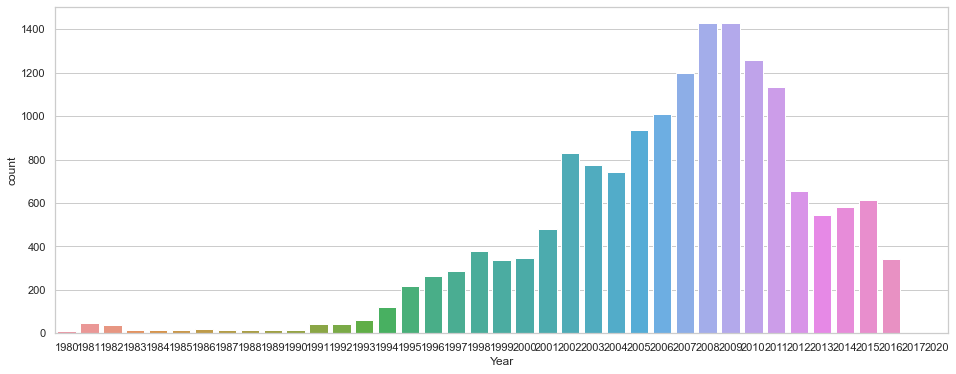

In [36]:
sns.countplot(df.Year)

3. На каких платформах произошло больше всего релизов? \
   Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%

In [44]:
df.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [67]:
perc_plat = df.Platform.value_counts(normalize=True).mul(100)

In [68]:
perc_plat.to_frame().query('Platform > 7').index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [86]:
df.Publisher.value_counts().head(1)

Electronic Arts    1339
Name: Publisher, dtype: int64

In [90]:
ss.mode(df.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

5. Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). \
   В каком регионе медианное значение объема продаж является наибольшим?

In [96]:
df.query('Publisher == "Nintendo"').describe().T

count         mean          std      min        25%       50%  \
Rank          696.0  3801.864943  3969.268372     1.00   710.7500  2262.000   
Year          696.0  2003.830460     7.776370  1983.00  2000.0000  2005.000   
NA_Sales      696.0     1.172055     2.989913     0.00     0.0100     0.375   
EU_Sales      696.0     0.601006     1.743953     0.00     0.0075     0.120   
JP_Sales      696.0     0.653721     1.063110     0.00     0.0900     0.280   
Other_Sales   696.0     0.136767     0.464170     0.00     0.0000     0.030   
Global_Sales  696.0     2.563836     5.676925     0.01     0.3000     0.920   

                    75%       max  
Rank          5901.7500  16545.00  
Year          2009.0000   2016.00  
NA_Sales         0.9725     41.49  
EU_Sales         0.4825     29.02  
JP_Sales         0.7400     10.22  
Other_Sales      0.0900      8.46  
Global_Sales     2.2625     82.74

In [98]:
df.query('Publisher == "Nintendo"')[['NA_Sales', 'EU_Sales', 'JP_Sales']].agg({'mean', 'median', 'std'})

NA_Sales  EU_Sales  JP_Sales
std     2.989913  1.743953  1.063110
mean    1.172055  0.601006  0.653721
median  0.375000  0.120000  0.280000

6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

In [121]:
df.query('Publisher == "Nintendo"') \
    .groupby('Genre', as_index=False) \
    .agg({'mean', 'median'}) \
    .JP_Sales.T

Genre     Action  Adventure  Fighting    Misc  Platform    Puzzle   Racing  \
mean    0.373846   0.257429      0.83  0.5525  0.922162  0.501216  0.78973   
median  0.170000   0.090000      0.50  0.2500  0.540000  0.255000  0.34000   

Genre   Role-Playing  Shooter  Simulation    Sports  Strategy  
mean        0.970952  0.25125    0.844643  0.652182  0.337419  
median      0.360000  0.13000    0.390000  0.250000  0.190000

In [142]:
Nintendo_JP_df = df[['Publisher','JP_Sales', 'Genre']].query('Publisher == "Nintendo"')

<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

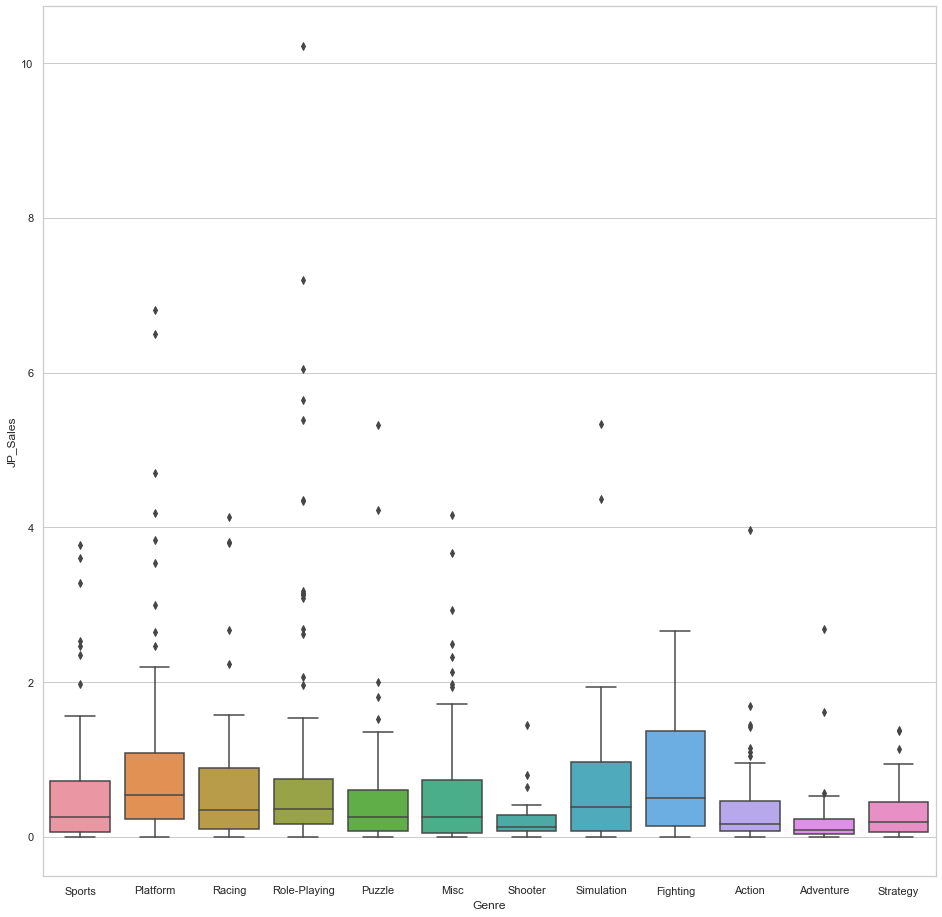

In [143]:
plt.figure(figsize=(16,16))
sns.boxplot(data=Nintendo_JP_df, x='Genre', y = 'JP_Sales')

7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. \
   На каком отрезке времени произошло резкое увеличение продаж игр жанра Sports?

In [145]:
genres = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']

In [151]:
Nintendo_gl_s = df.query('Publisher == "Nintendo" and Genre in @genres') \
    .groupby(['Year', 'Genre'], as_index=False) \
    .agg({'Global_Sales': 'sum'}) \
    .sort_values('Year', ascending=False)

In [152]:
Nintendo_gl_s.head()

Year       Genre  Global_Sales
113  2016  Simulation          0.02
112  2015      Sports          0.45
111  2015  Simulation          2.98
110  2015    Platform          5.24
109  2014      Sports          0.88

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

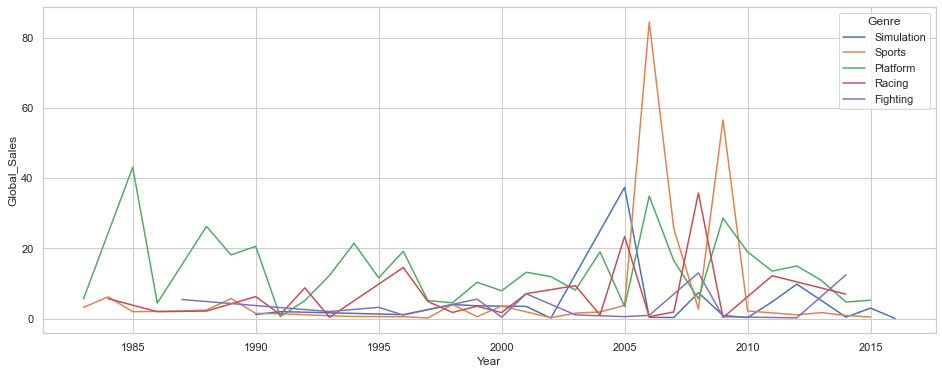

In [159]:
sns.lineplot(data=Nintendo_gl_s, x='Year', y='Global_Sales', hue='Genre')